In [1]:
%matplotlib inline

In [1]:
from scipy.stats import logistic
import numpy as np
import matplotlib.pyplot as plt

from aptos.model import rolloff, sin_decay

## Warmup / Rolloff

In [2]:
def rolloff(length, loc_factor=0.5, scale_factor=0.1, magnitude=1, offset=0):
    """
    Produces a rolloff function over a given length. Imagine 1 - sigmoid(x).
    """
    loc = length * loc_factor
    scale = length * scale_factor
    rolloff = np.array([logistic.sf(x, loc, scale) for x in range(length)])
    rolloff *= magnitude
    rolloff += offset
    return rolloff

In [25]:
length = 50
loc_factor = 0.3
scale_factor = 0.15
magnitude = 1

In [26]:
lrs = rolloff(length, loc_factor, scale_factor, magnitude)
lrs

array([0.88079708, 0.86607211, 0.84983829, 0.83201839, 0.81255021,
       0.79139147, 0.76852478, 0.74396249, 0.71775106, 0.68997448,
       0.66075637, 0.63026022, 0.59868766, 0.56627439, 0.53328404,
       0.5       , 0.46671596, 0.43372561, 0.40131234, 0.36973978,
       0.33924363, 0.31002552, 0.28224894, 0.25603751, 0.23147522,
       0.20860853, 0.18744979, 0.16798161, 0.15016171, 0.13392789,
       0.11920292, 0.10589896, 0.0939215 , 0.0831727 , 0.07355418,
       0.06496917, 0.05732418, 0.05053016, 0.04450336, 0.03916572,
       0.0344452 , 0.03027569, 0.02659699, 0.02335452, 0.02049901,
       0.01798621, 0.01577647, 0.01383439, 0.01212843, 0.01063058])

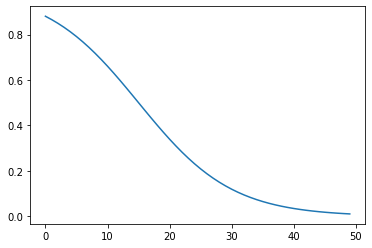

In [27]:
plt.plot(lrs)

## Decaying sinusoid

In [7]:
offset = 0.5
amplitude = 3
n_periods = 3.75
n_epochs = 100
gamma = 0.97

In [8]:
sin = sin_decay(offset, amplitude, n_periods, n_epochs, gamma)

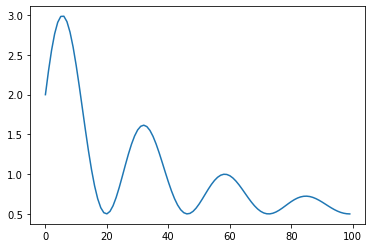

In [9]:
plt.plot(sin)